In [69]:
# importing the required libraries
import pandas as pd
import  numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [70]:
#catching the required data
df = pd.DataFrame(load_breast_cancer()['data'],columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']

In [71]:
#seeing the x_var
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [72]:
#understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [73]:
# to convert the independent var to std normal form,
X=df.drop(['y'],axis=1)
y=load_breast_cancer()['target']

In [74]:
# normalising the x variables
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [75]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    shuffle=True,
    random_state=43,
    train_size=0.7,
    test_size=0.3)

In [76]:
# Running the loop and training the respective models
models=[DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=10)]
cont={}
for model in models:
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   test_pred = model.predict(x_test)
   train_accuracy=accuracy_score(train_pred,y_train)
   test_accuracy=accuracy_score(test_pred,y_test)
   model_name = type(model).__name__
   cont[model_name]=[train_accuracy,test_accuracy]
   print(f"model_name is:{model_name}")
   print(f"train_accuracy is:{train_accuracy}")
   print(f"test_accuracy is:{test_accuracy}")


model_name is:DecisionTreeClassifier
train_accuracy is:1.0
test_accuracy is:0.9239766081871345
model_name is:RandomForestClassifier
train_accuracy is:1.0
test_accuracy is:0.9707602339181286
model_name is:GradientBoostingClassifier
train_accuracy is:1.0
test_accuracy is:0.9707602339181286
model_name is:KNeighborsClassifier
train_accuracy is:0.9723618090452262
test_accuracy is:0.9532163742690059


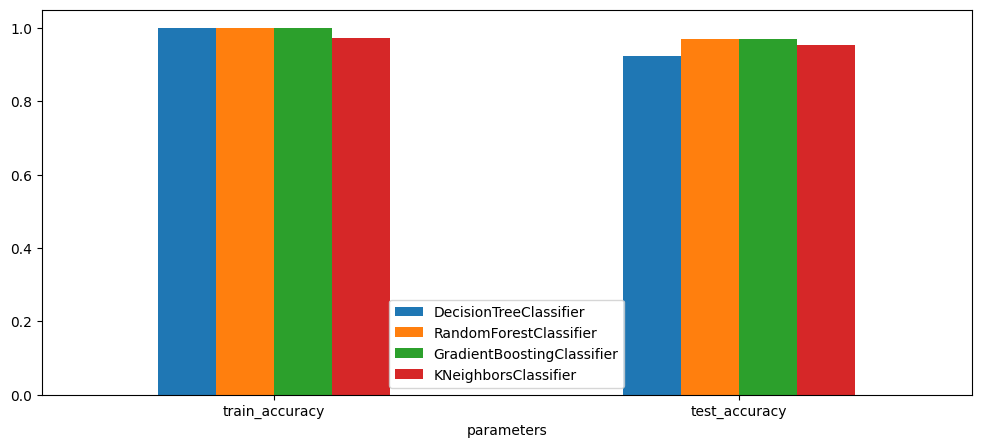

In [77]:
# Plotting a bar graph to compare and contrast b/w results of all models
frame=pd.DataFrame.from_dict(cont)
frame['parameters']={0:'train_accuracy',1:'test_accuracy'}
ax=frame.plot.bar(x='parameters',rot=0,figsize=(12,5))

In [78]:
# Finding the best parameters for the decision tree algorithm
estimator=DecisionTreeClassifier(random_state=0)


In [79]:
dt_parameters={'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 50, 100], 'min_samples_leaf':[10, 20, 50]}

In [80]:
cv_grid= GridSearchCV(estimator, param_grid = dt_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.977 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.985 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.981 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.973 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.943 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.963 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.994 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.968 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.969 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.9

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50]},
             scoring='roc_auc', verbose=5)

In [81]:
cv_grid.cv_results_

{'mean_fit_time': array([0.00451865, 0.00458369, 0.00362   , 0.00464683, 0.00445728,
        0.00403862, 0.00446339, 0.00443349, 0.00364285, 0.00461659,
        0.00484548, 0.00373583, 0.00579777, 0.00501738, 0.0047452 ,
        0.00559258, 0.00501308, 0.00479331, 0.00556049, 0.00509834,
        0.00500965, 0.00576987, 0.00586739, 0.00423417]),
 'std_fit_time': array([0.00032328, 0.00017124, 0.00044938, 0.00026678, 0.00023901,
        0.00022483, 0.00059092, 0.000153  , 0.00018757, 0.0003695 ,
        0.00084364, 0.0001663 , 0.00202337, 0.00017631, 0.0007489 ,
        0.00048252, 0.00020452, 0.00144638, 0.00050653, 0.00038966,
        0.00134847, 0.00056117, 0.00126172, 0.00042697]),
 'mean_score_time': array([0.00205736, 0.00176396, 0.00179176, 0.0016861 , 0.00168619,
        0.00183182, 0.0019546 , 0.00164347, 0.00156307, 0.00166321,
        0.00167537, 0.00177727, 0.00194254, 0.00169196, 0.00189114,
        0.001828  , 0.00175238, 0.00230637, 0.0020308 , 0.00181046,
        0.002243

In [82]:
best_parameters = cv_grid.best_estimator_.get_params()

In [83]:
best_parameters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [84]:
for param_name in sorted(dt_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	criterion: 'gini'
	max_depth: 10
	min_samples_leaf: 10


In [85]:
pred_test = cv_grid.predict(x_test)
print(recall_score(y_test, pred_test))
print(precision_score(y_test, pred_test))
print(roc_auc_score(pred_test,y_test))
print("confustion matrix on validation data: \n" , str(confusion_matrix(y_test, pred_test)))

0.9385964912280702
0.9553571428571429
0.9183565375302664
confustion matrix on validation data: 
 [[ 52   5]
 [  7 107]]
